<h1><center>Assignment-2<center></h1>

Predict insurance ***charges*** from the following dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check if any Pre-processing Required

In [3]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

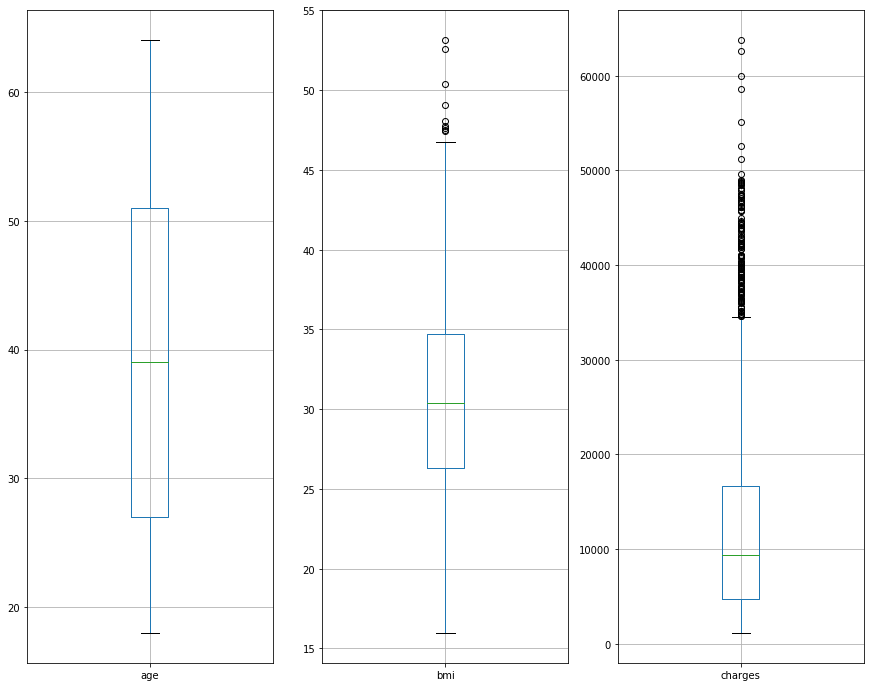

In [4]:
plt.figure(figsize=(15,12))
plt.subplot(1,3,1)
data.boxplot(column='age', vert=True)
plt.subplot(1,3,2)
data.boxplot(column='bmi', vert=True)
plt.subplot(1,3,3)
data.boxplot(column='charges', vert=True)

# Outliers exist, but may be useful in prdiction

## One Hot Encode Categorical Data

In [5]:
dataEncoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
dataEncoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Train Model

In [6]:
X_df_columns = dataEncoded.columns
X_df_columns = X_df_columns.drop(['charges'])
Y_df_columns = ['charges']

X_df = dataEncoded[X_df_columns].values
Y_df = dataEncoded[Y_df_columns].values

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

regressionModel = LinearRegression()

regressionModel.fit(X_train, Y_train)
Y_pred = regressionModel.predict(X_test)

## Check Accuracy and Error

In [7]:
print("R2 Score on whole set:", regressionModel.score(X_df, Y_df))
print("R2 score on Test set:", regressionModel.score(X_test, Y_test))

R2 Score on whole set: 0.7506500728231756
R2 score on Test set: 0.7835929767120723


In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4181.194473753644
Mean Squared Error: 33596915.85136146
Root Mean Squared Error: 5796.2846592762735
